# \*\*\[ggplot3\]\*\*With Non tidy Data

SEOYEON CHOI  
2023-08-25

데이터 출처 : https://github.com/nickhould/tidy-data-python

https://partrita.github.io/posts/tidy-data/

# Import

In [2]:
source('ggplot3.R')

In [2]:
library(mgcv)

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.9-0. For overview type 'help("mgcv-package")'.


In [3]:
billboard <- read.csv('./data/billboard.csv')

In [4]:
tb <- read.csv('./data/tb-raw.csv')

In [5]:
pew <- read.csv('./data/pew-raw.csv')

# Tidydata

-   각 변수는 개별 열로 존재
-   각 관측치는 행으로 구성
-   각 표는 단 하난의 관측 기준에 의해서 조직된 데이터를 저장
-   여러개의 표가 존재한다면 적어도 하나 이상의 열이 공유되어야 함

# results

## try1

condition 부여 후 색 구분

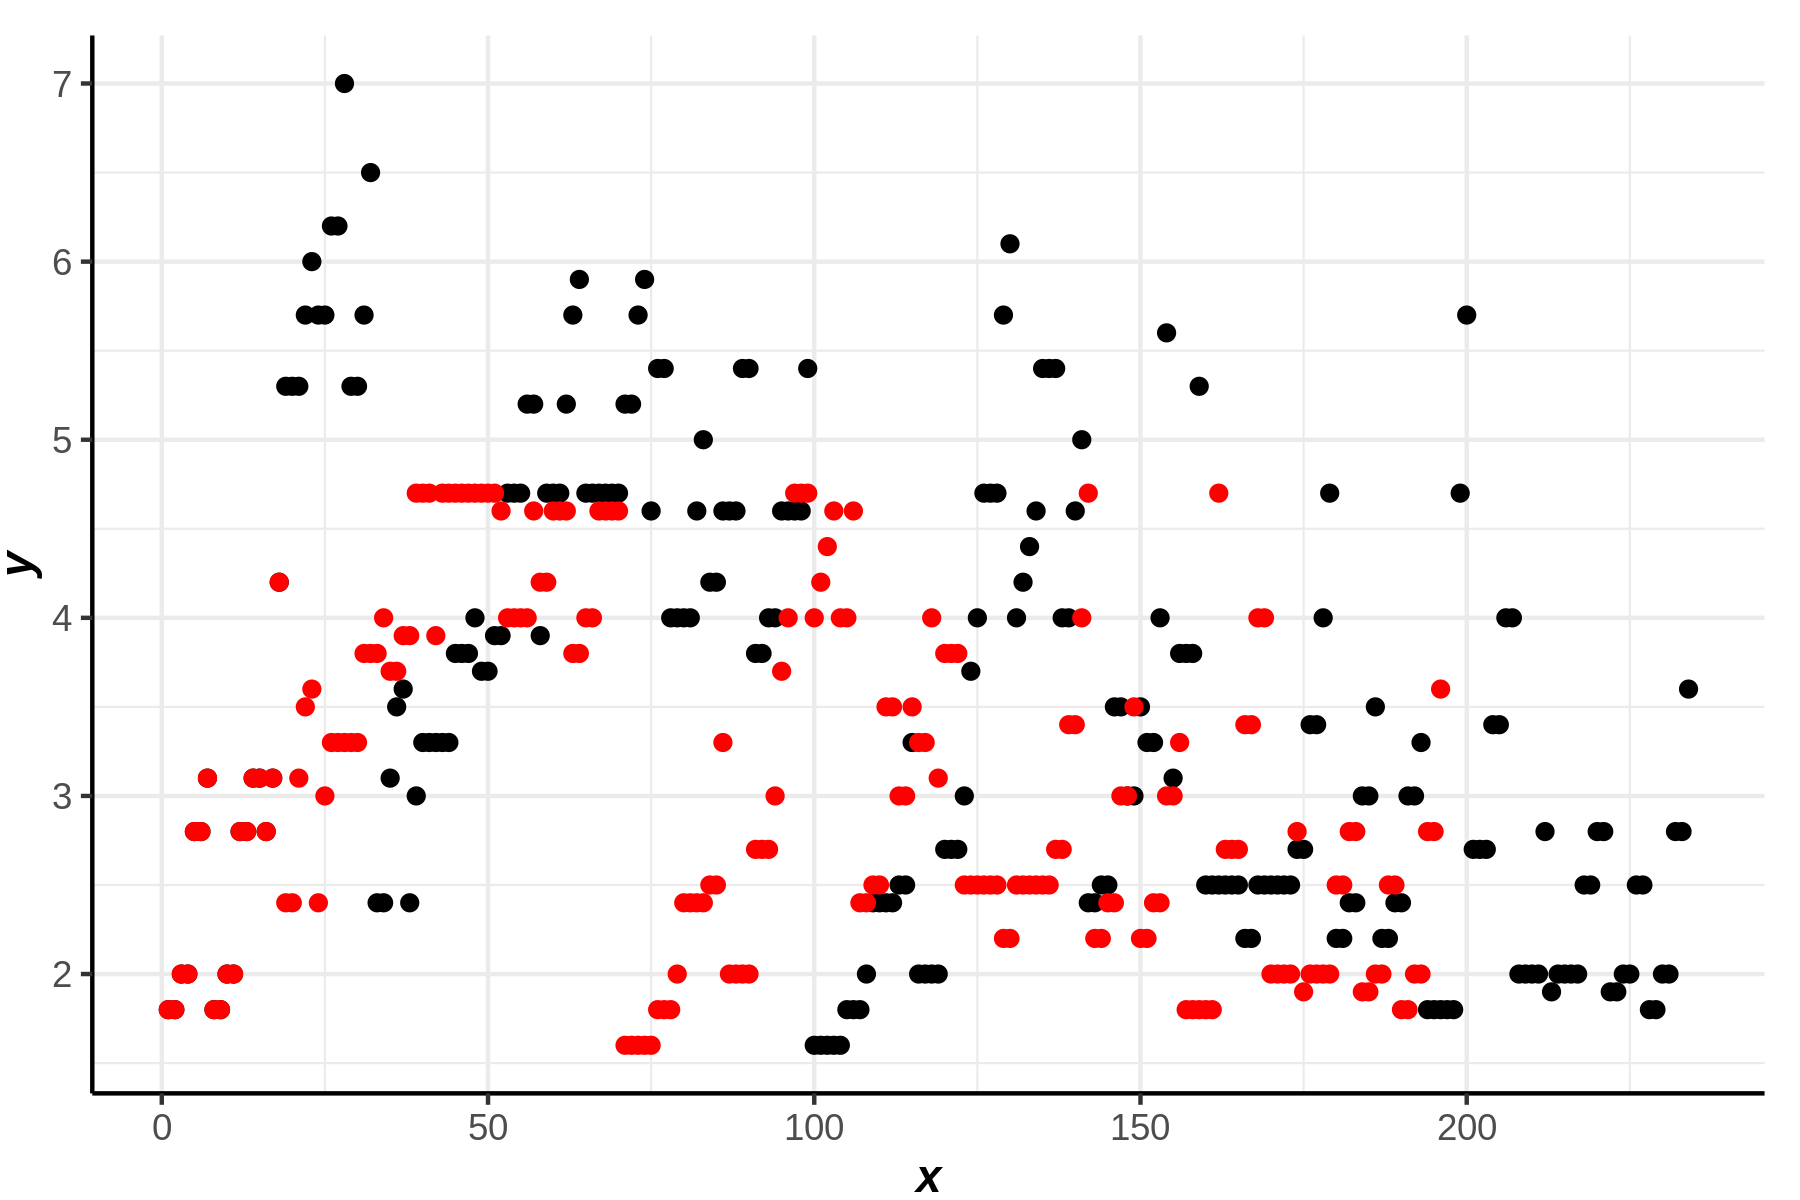

In [9]:
ggplot() + point(mpg$displ,col='black') + point(mpg[(mpg$displ<5&mpg$displ>1),]$displ,col='red')

## try2

condition 부여 후 절단

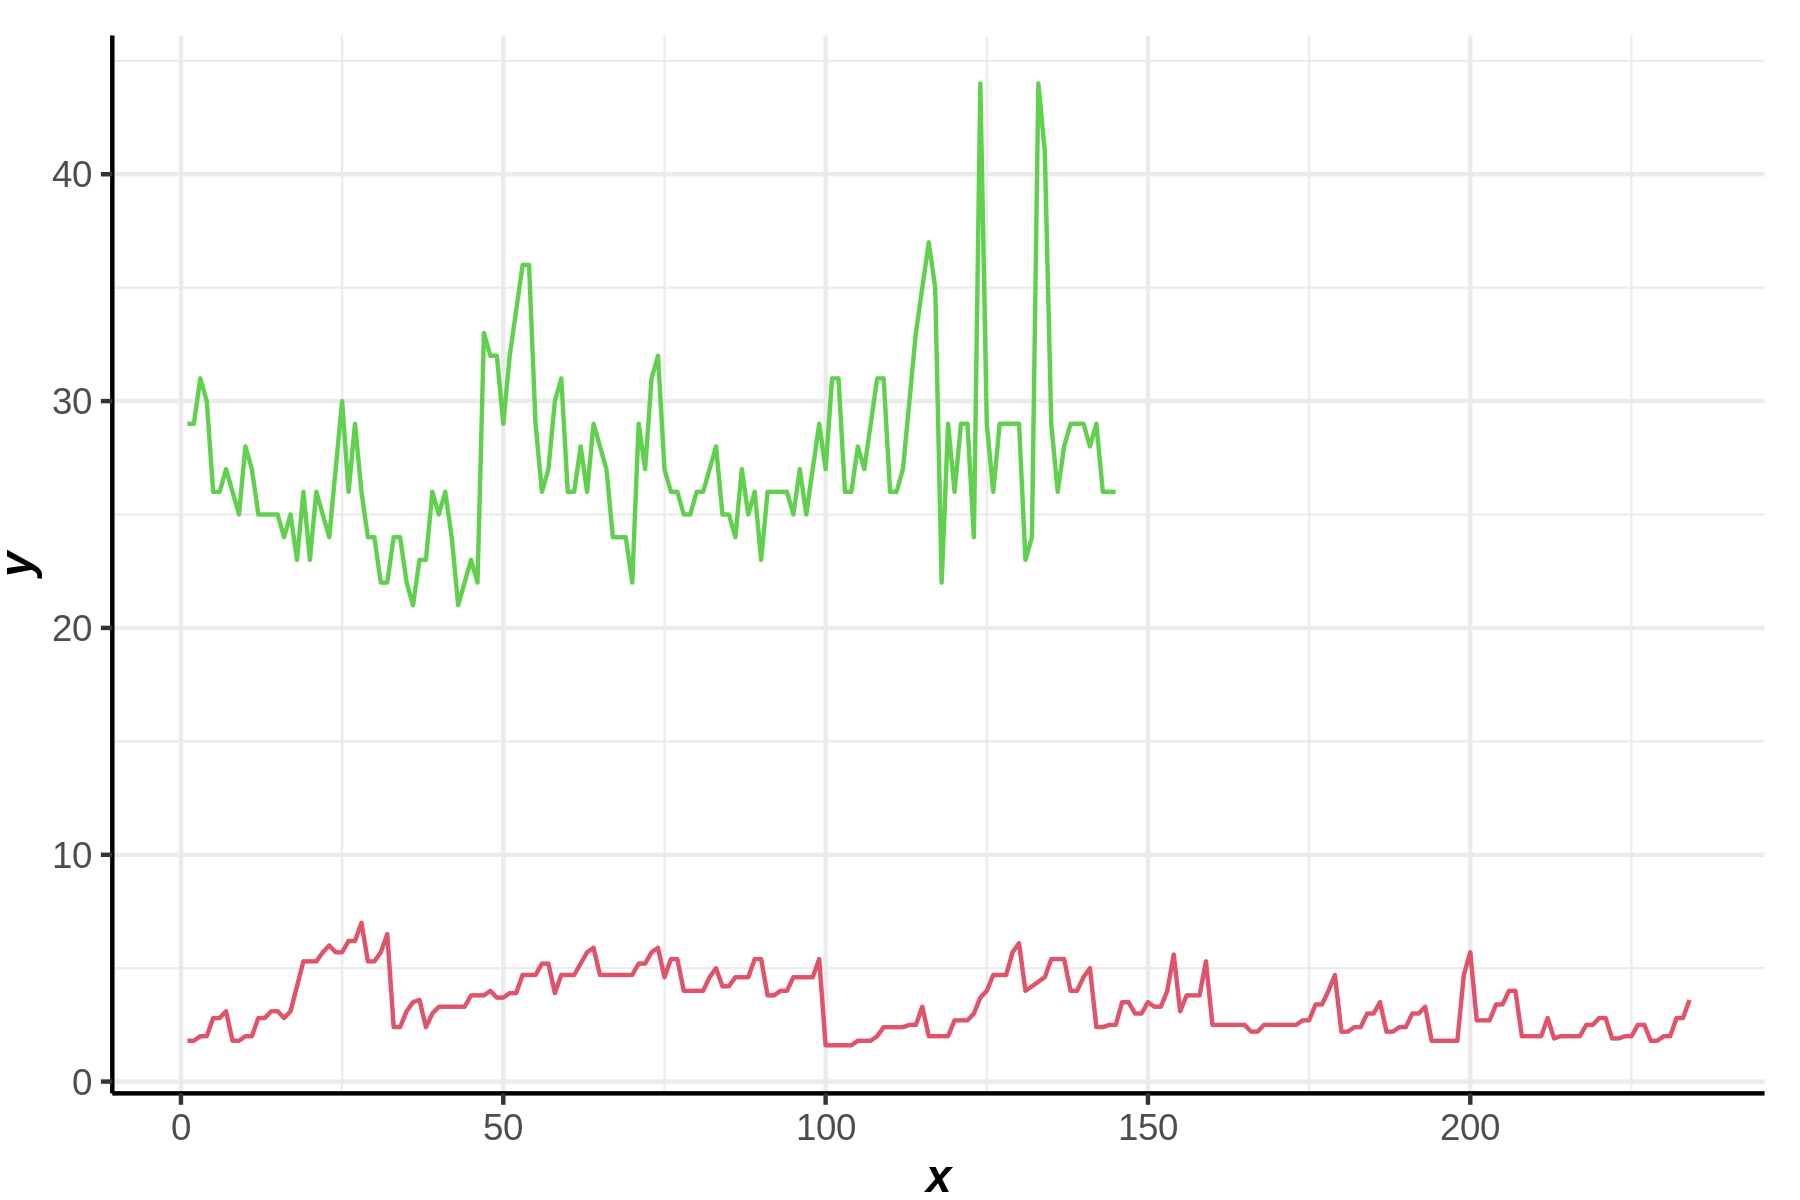

In [10]:
ggplot() + line(mpg$displ,col=2,label='a') + line(mpg[mpg$hwy>20,]$hwy,col=3,label='b')

## try3

색 자동 지정은 label의 알파벳 순 혹은 그려진 순

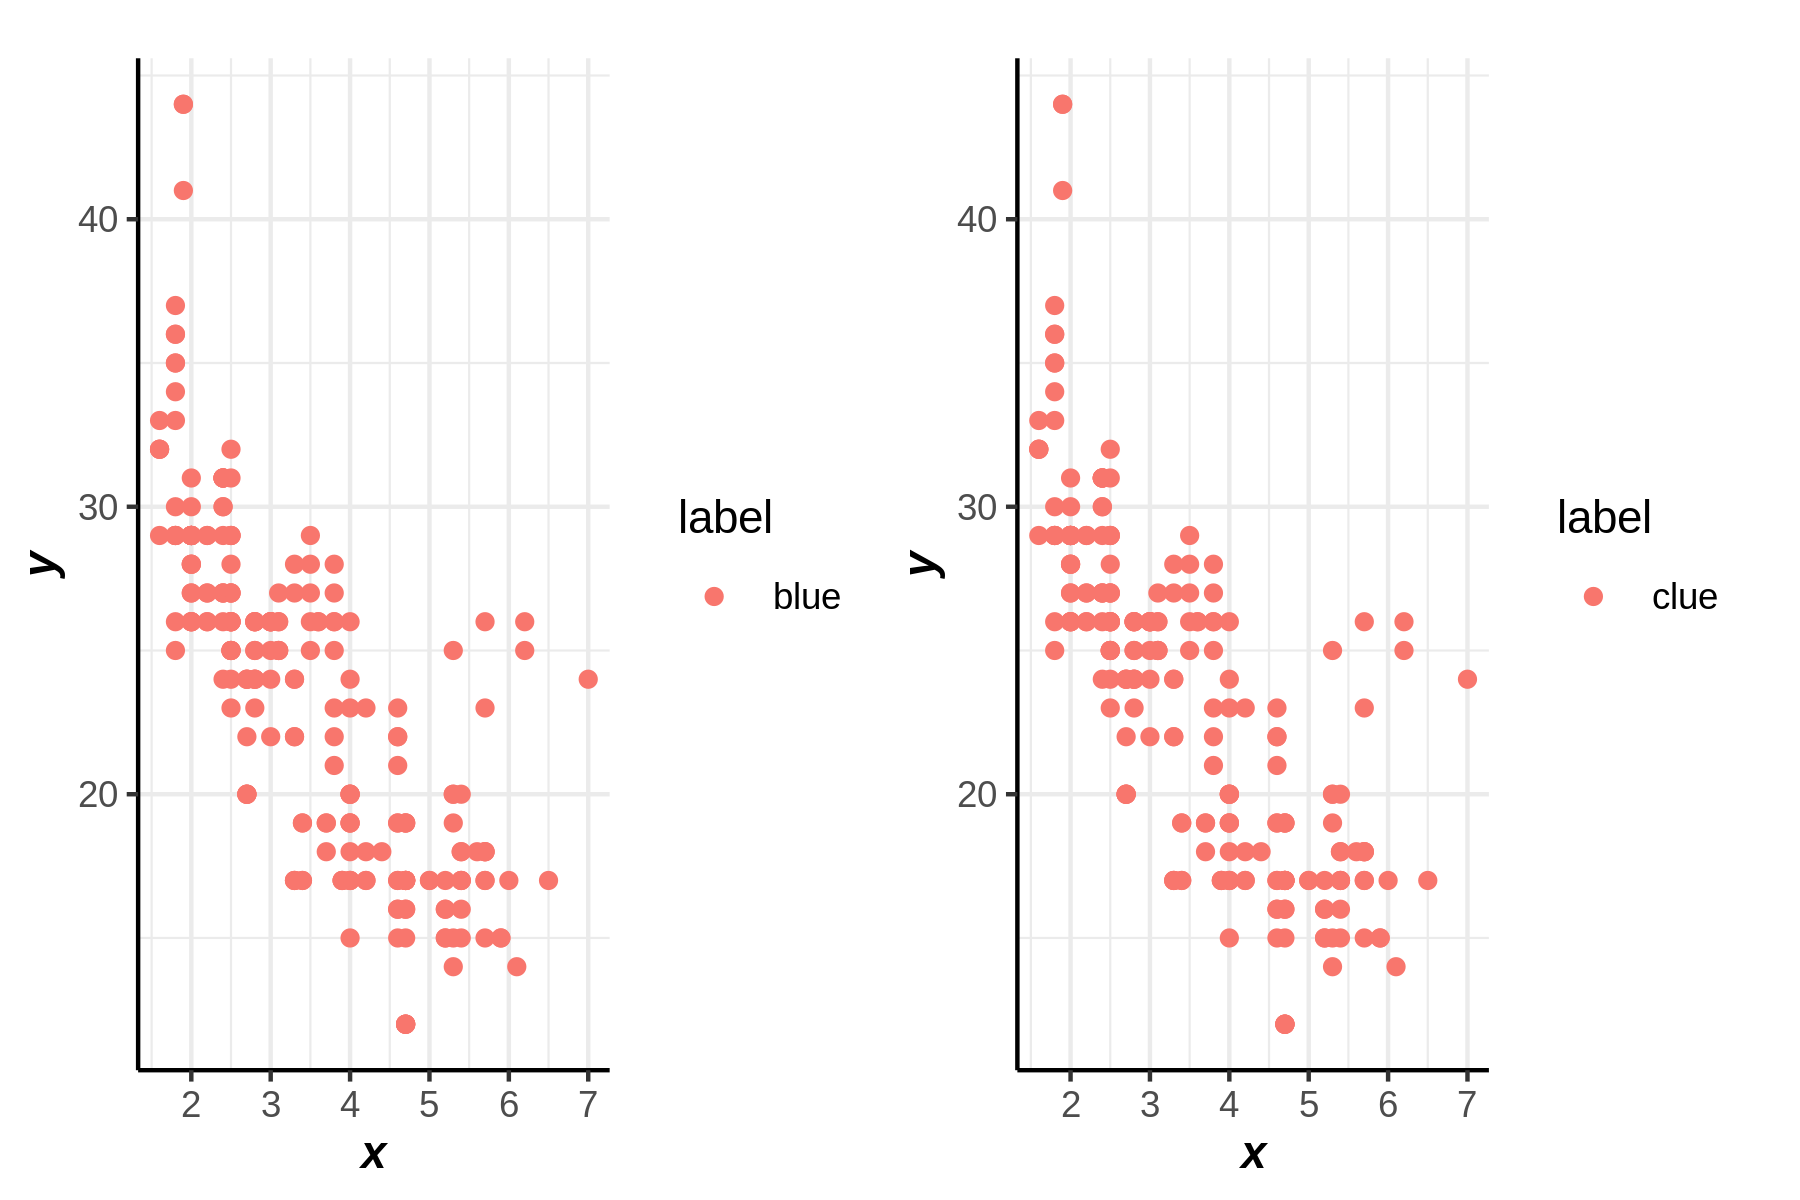

In [11]:
ggplot() + point(label='blue',mpg$displ, mpg$hwy)|ggplot() + point(mpg$displ, mpg$hwy,label='clue')

## try4 열 이름이 값인 데이터

In [17]:
head(pew)

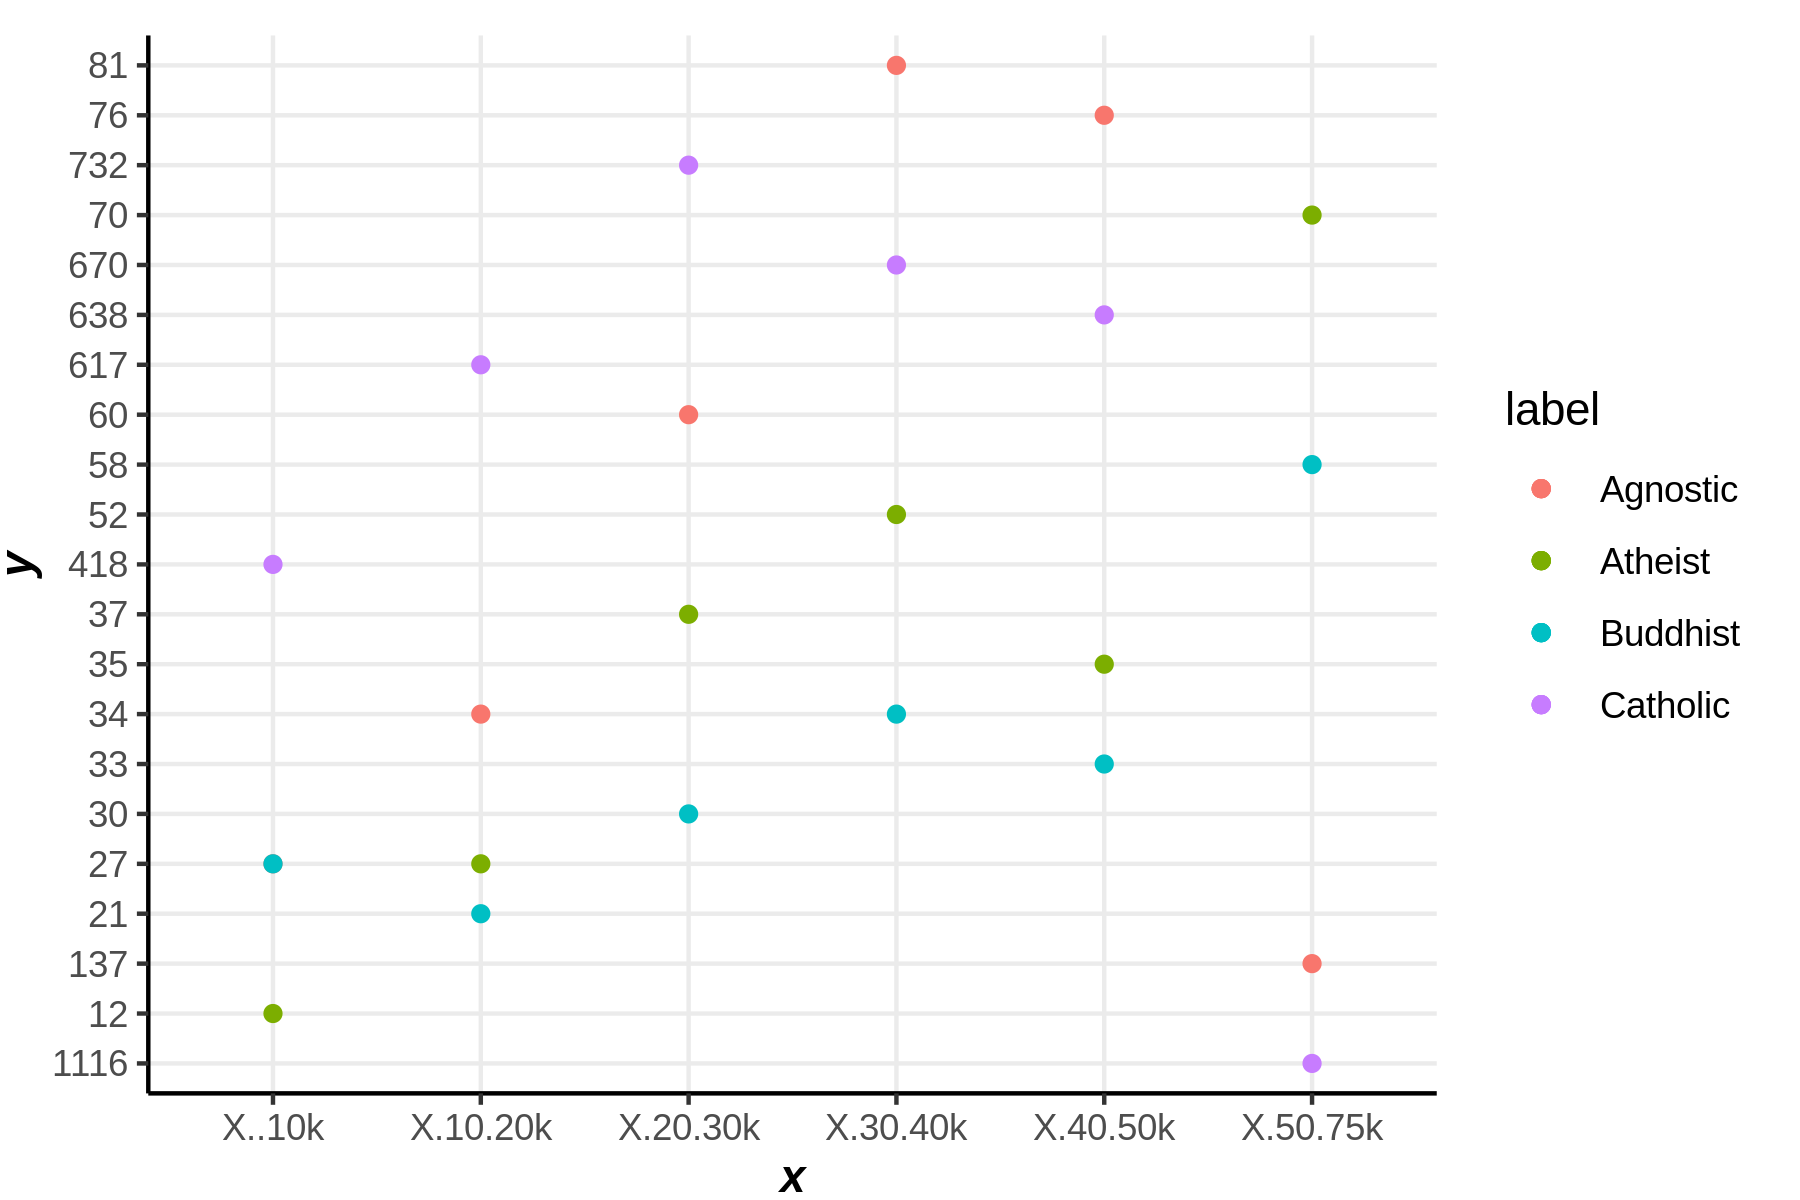

In [18]:
ggplot() + point(colnames(pew)[2:7],t(pew[pew$religion=='Agnostic',])[2:7],label = 'Agnostic') +
           point(colnames(pew)[2:7],t(pew[pew$religion=='Atheist',])[2:7],label = 'Atheist') +
           point(colnames(pew)[2:7],t(pew[pew$religion=='Buddhist',])[2:7],label = 'Buddhist') +
           point(colnames(pew)[2:7],t(pew[pew$religion=='Catholic',])[2:7],label = 'Catholic')

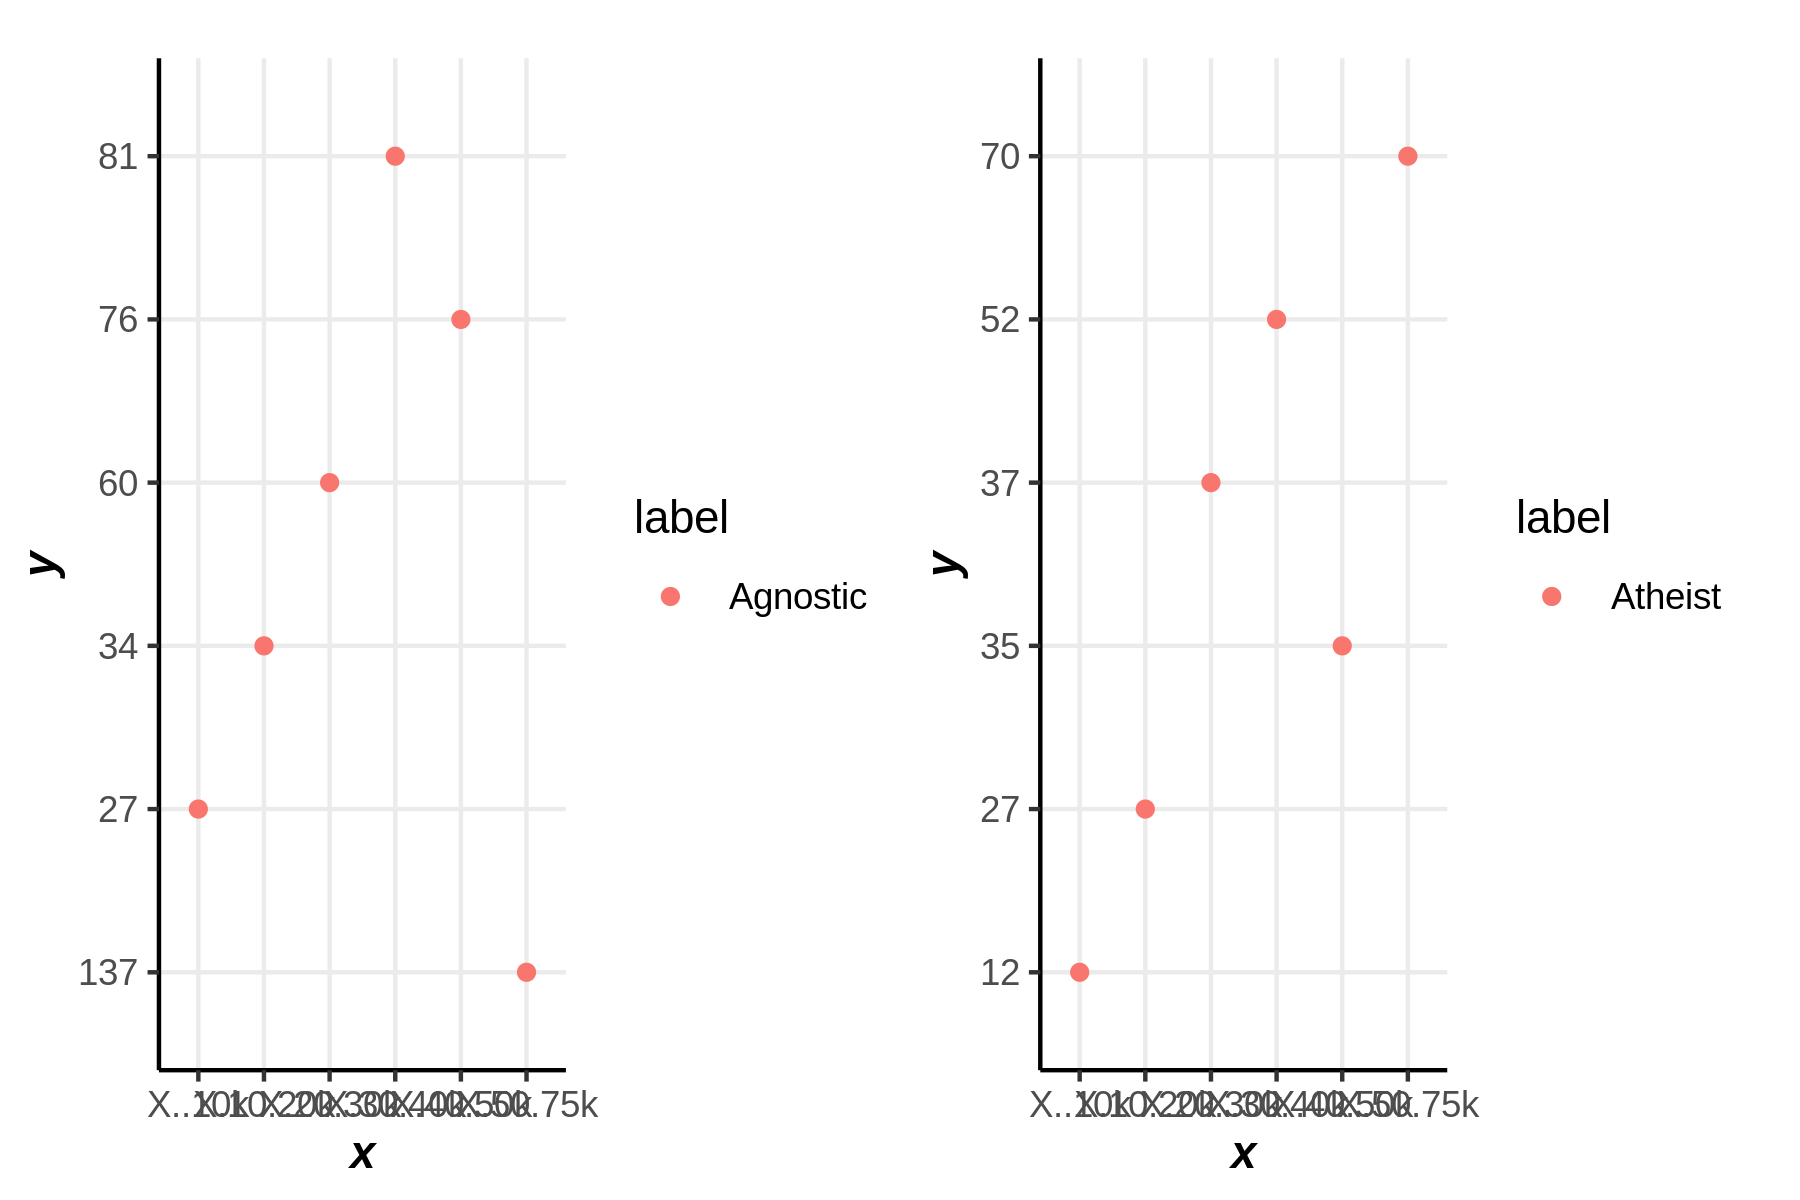

In [19]:
ggplot() + point(colnames(pew)[2:7],t(pew[pew$religion=='Agnostic',])[2:7],label = 'Agnostic')|ggplot() + point(colnames(pew)[2:7],t(pew[pew$religion=='Atheist',])[2:7],label = 'Atheist') 

## try5 하나의 표에 여러가지 타입 존재하는 데이터

In [20]:
unique(billboard$genre)

장르 별 1주차 빌보드 순위

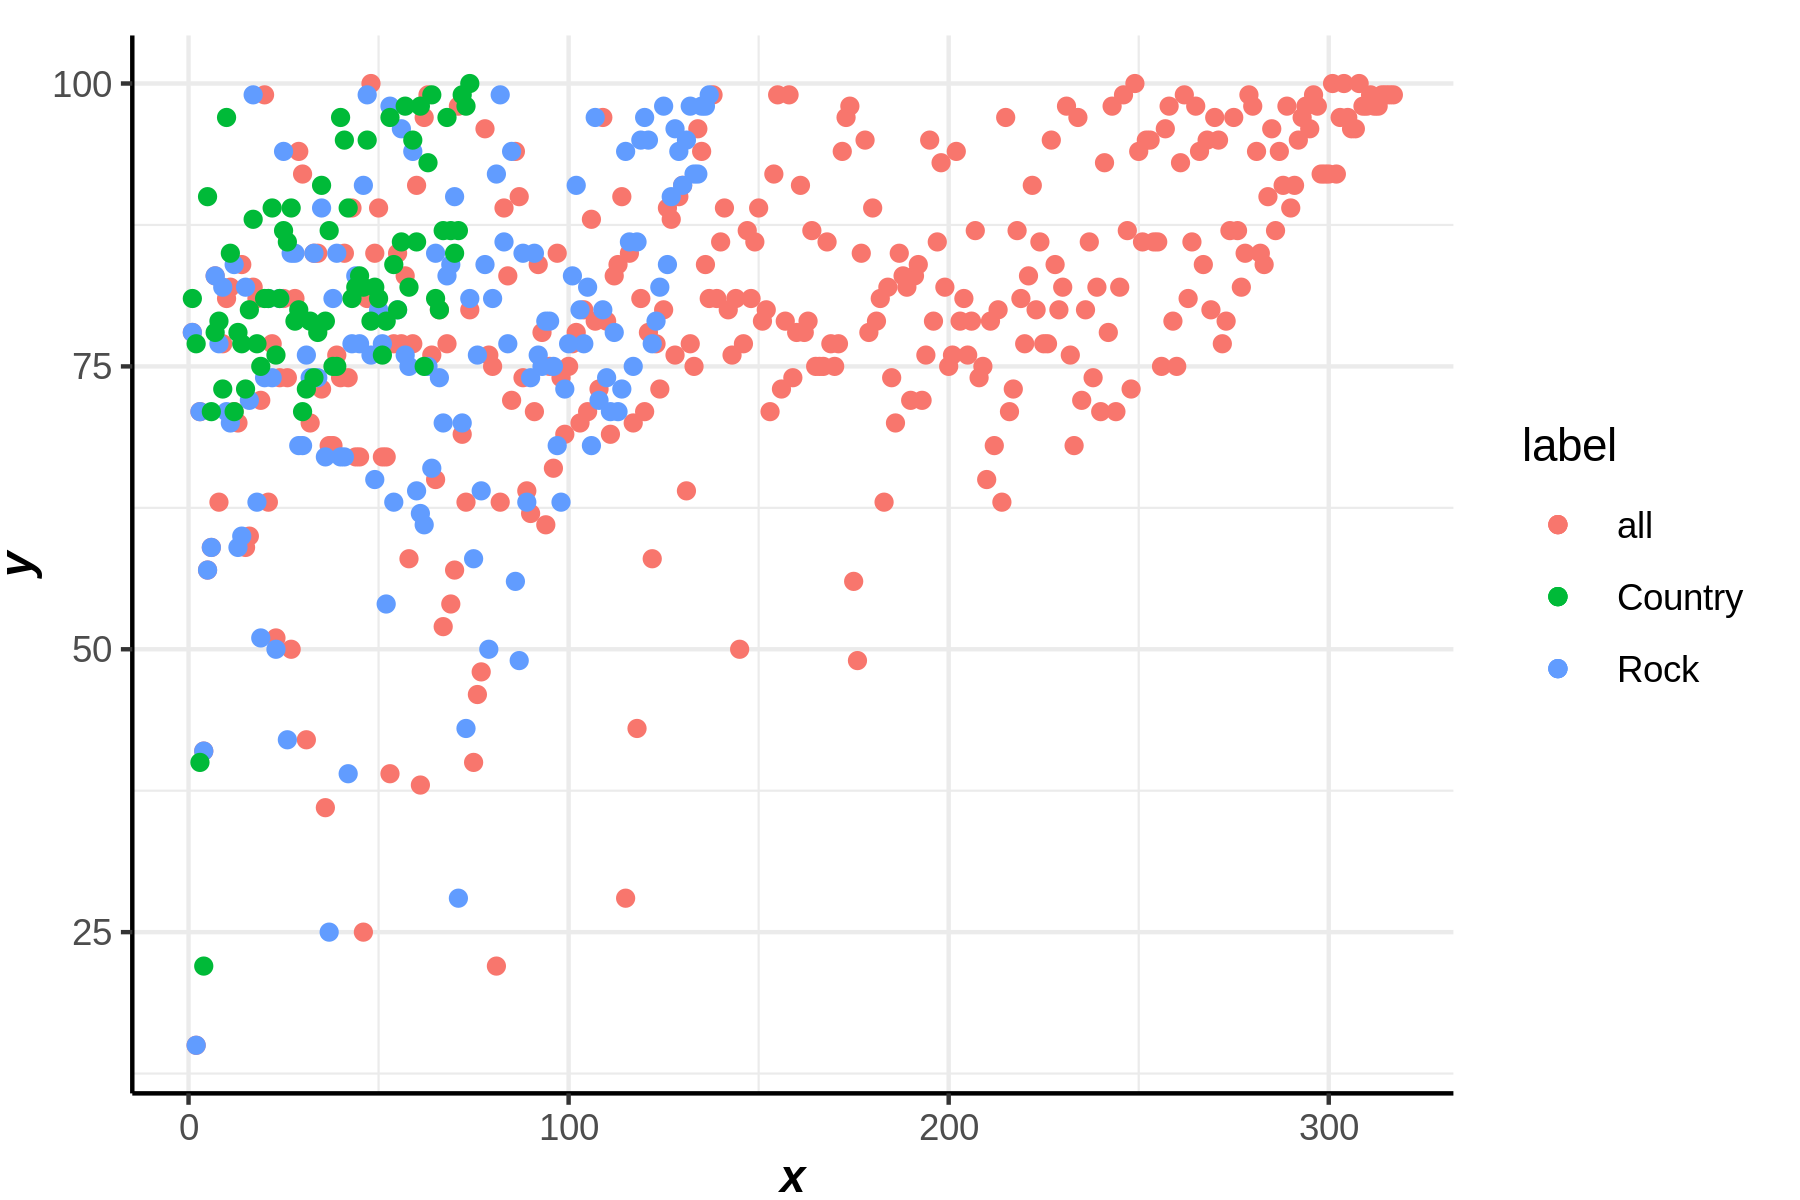

In [21]:
ggplot() + point(billboard$x1st.week,label='all') + point(billboard[billboard$genre=='Rock',]$x1st.week,label='Rock') + point(billboard[billboard$genre=='Country',]$x1st.week,label='Country')

In [22]:
head(billboard)

곡 별로 빌보드 차트에 얼마나 있었나 line

Warning message:
“Removed 48 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 50 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 43 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 52 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 55 rows containing missing values (`geom_line()`).”

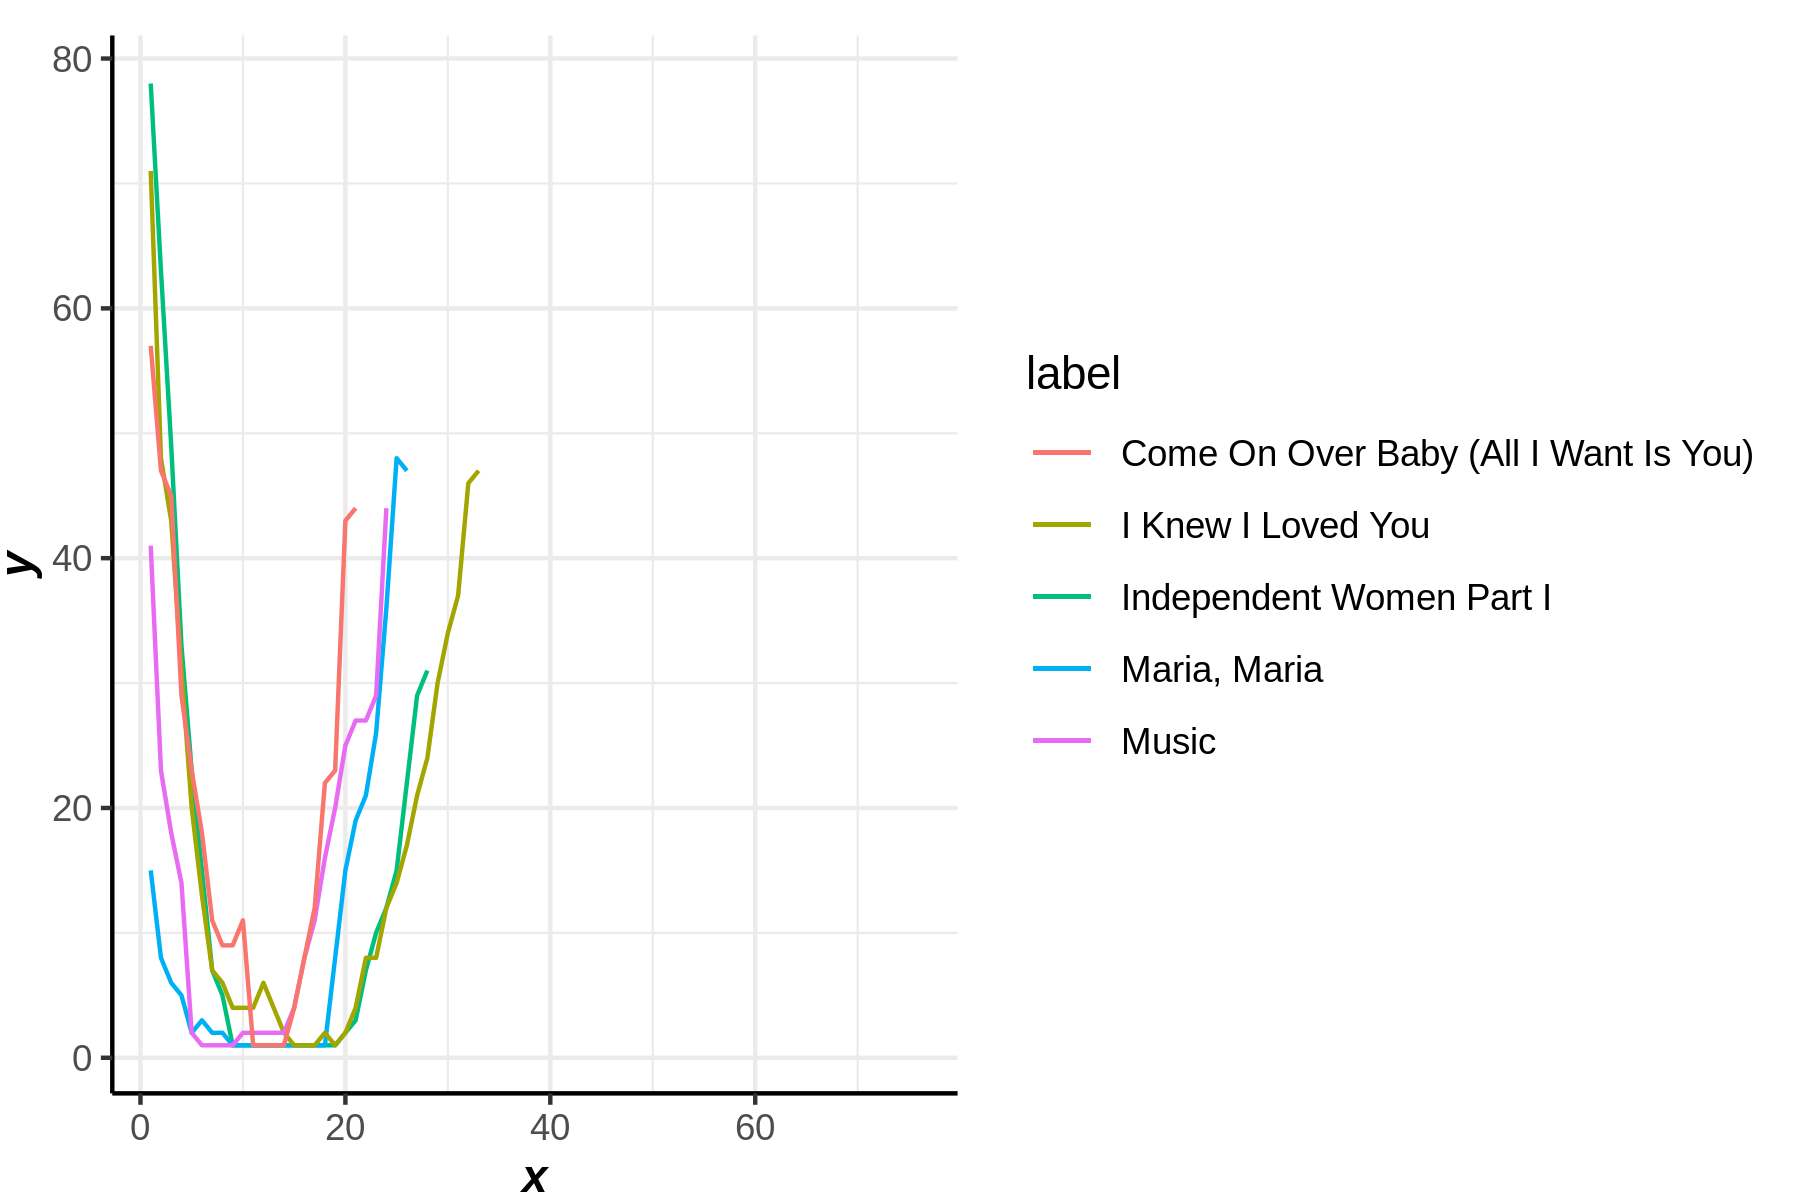

In [23]:
ggplot() + line(t(billboard[1,c(8:length(billboard))])[,1], label=billboard$track[1]) +
line(t(billboard[2,c(8:length(billboard))])[,1], label=billboard$track[2]) + 
line(t(billboard[3,c(8:length(billboard))])[,1], label=billboard$track[3]) + 
line(t(billboard[4,c(8:length(billboard))])[,1], label=billboard$track[4]) + 
line(t(billboard[5,c(8:length(billboard))])[,1], label=billboard$track[5])

Warning message:
“Removed 48 rows containing missing values (`geom_point()`).”

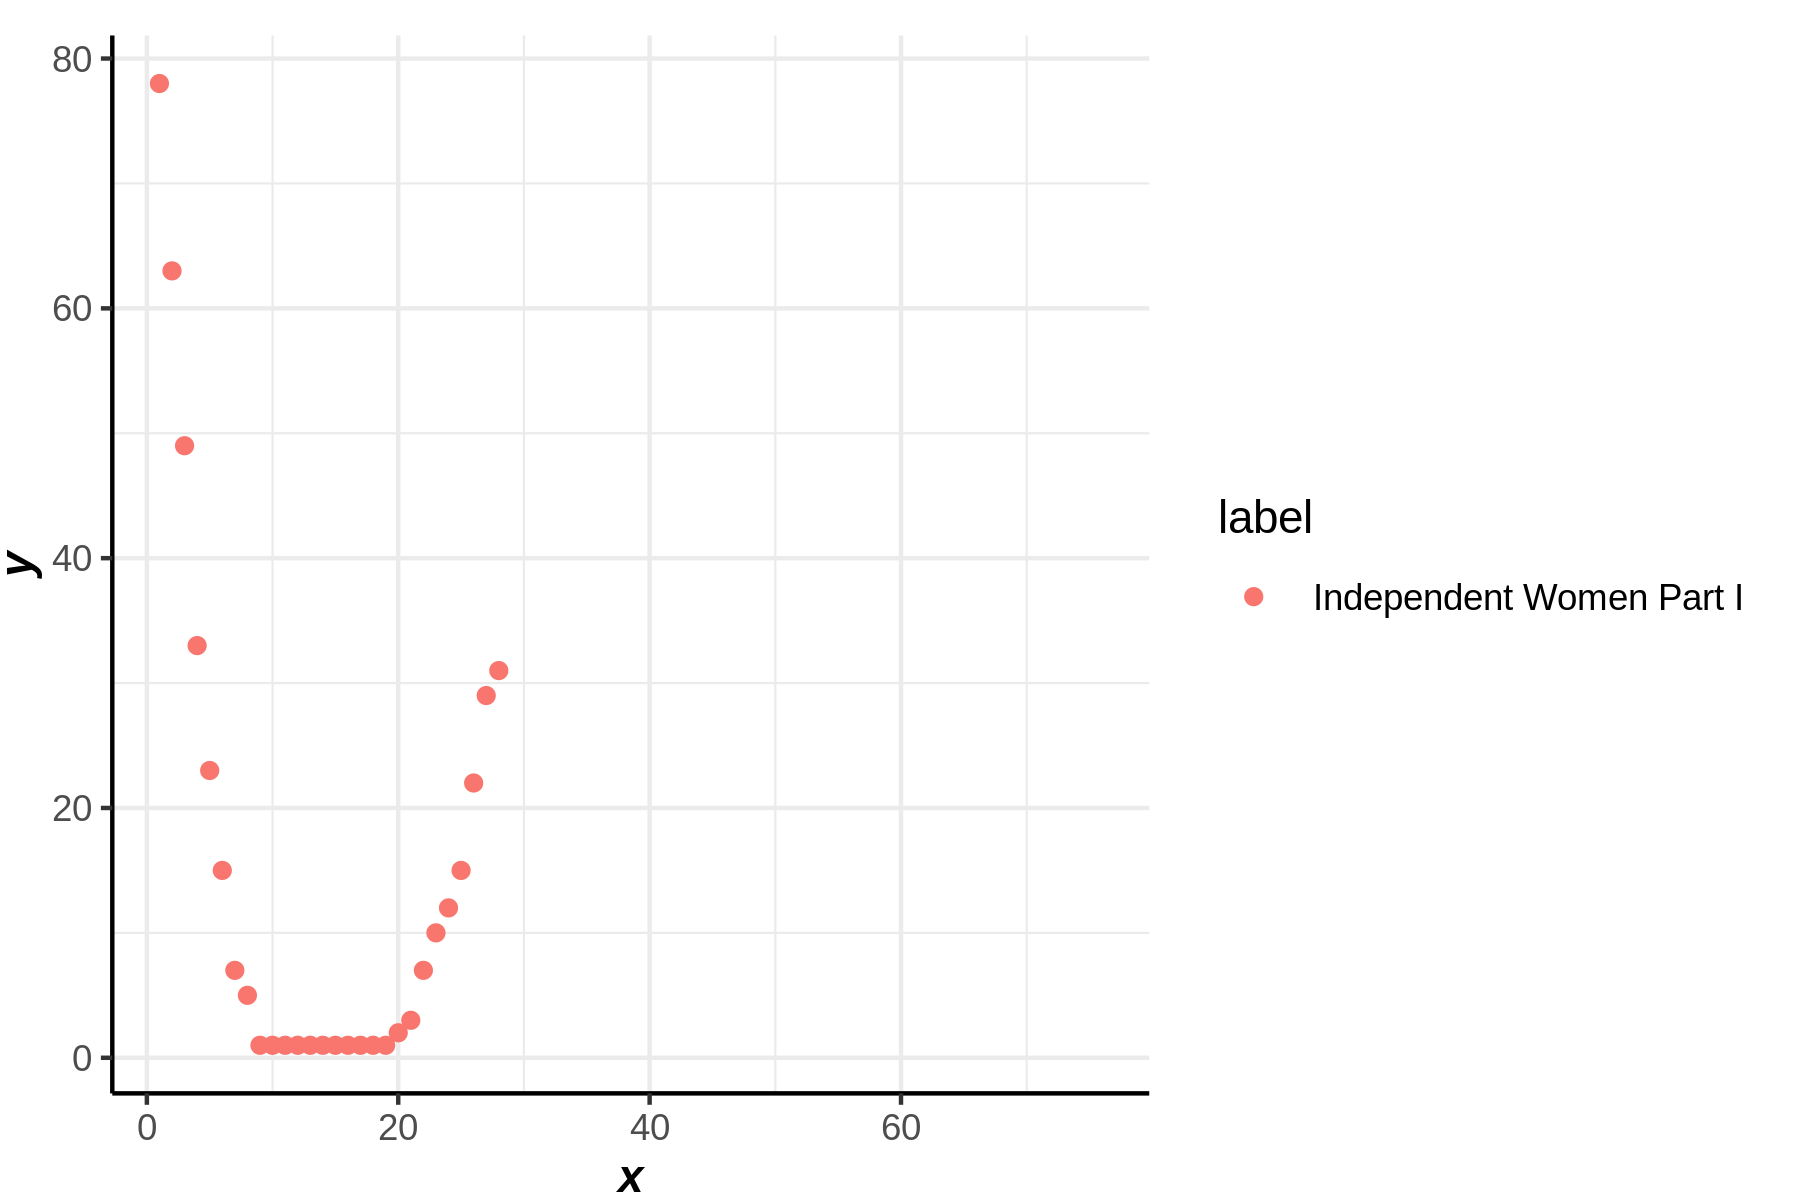

In [7]:
ggplot() + point(t(billboard[1,c(8:length(billboard))])[,1], label=billboard$track[1])

In [1]:
ggplot() + geom_point(t(billboard[1,c(8:length(billboard))])[,1], label=billboard$track[1])

## try6 다양한 변수가 하나의 열에 있는 데이터

WHO의 결핵환자 기록, m/f는 성별 슛저눈 나이대를 의미

In [27]:
head(tb)

Warning message:
“Removed 15 rows containing missing values (`geom_point()`).”

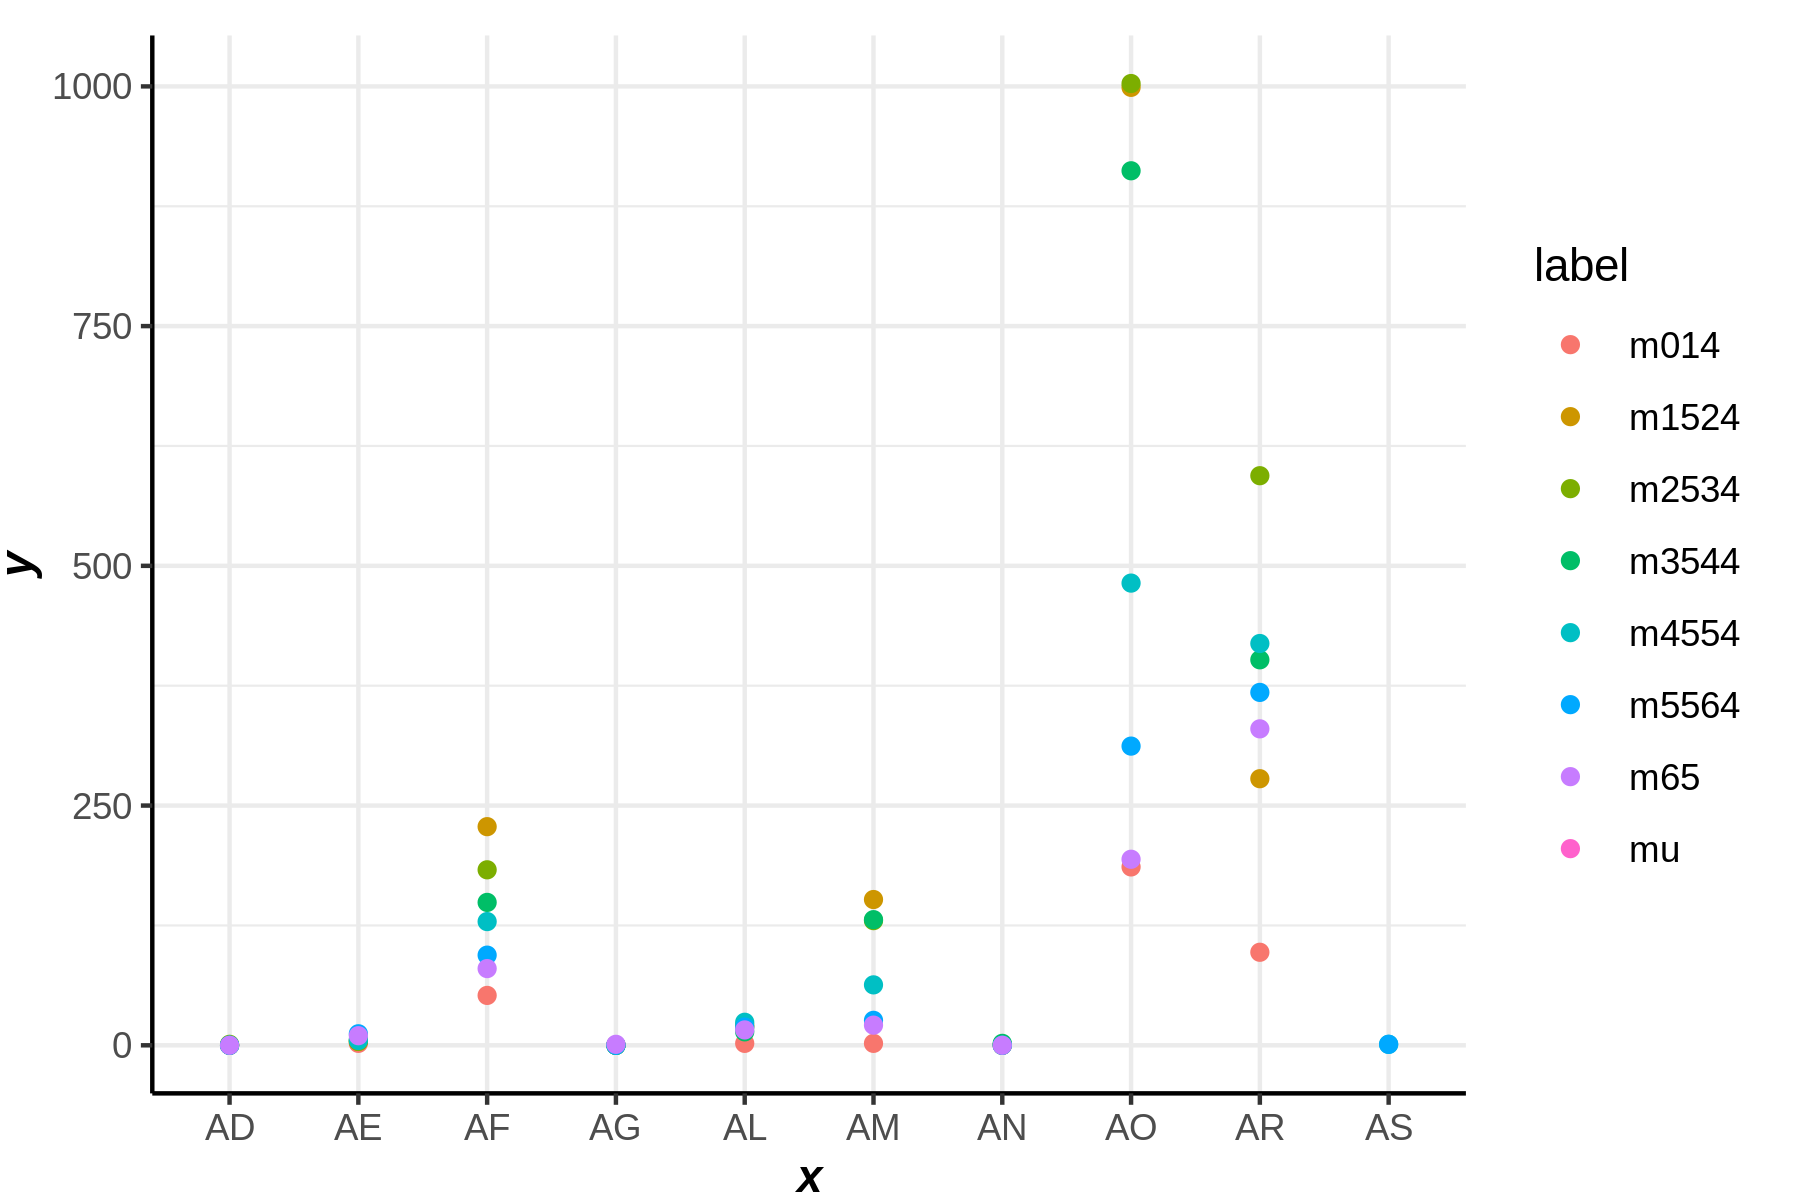

In [28]:
ggplot() + point(tb$country,subset(tb, select = grep("m", names(tb))))

# 수정?

## 1.

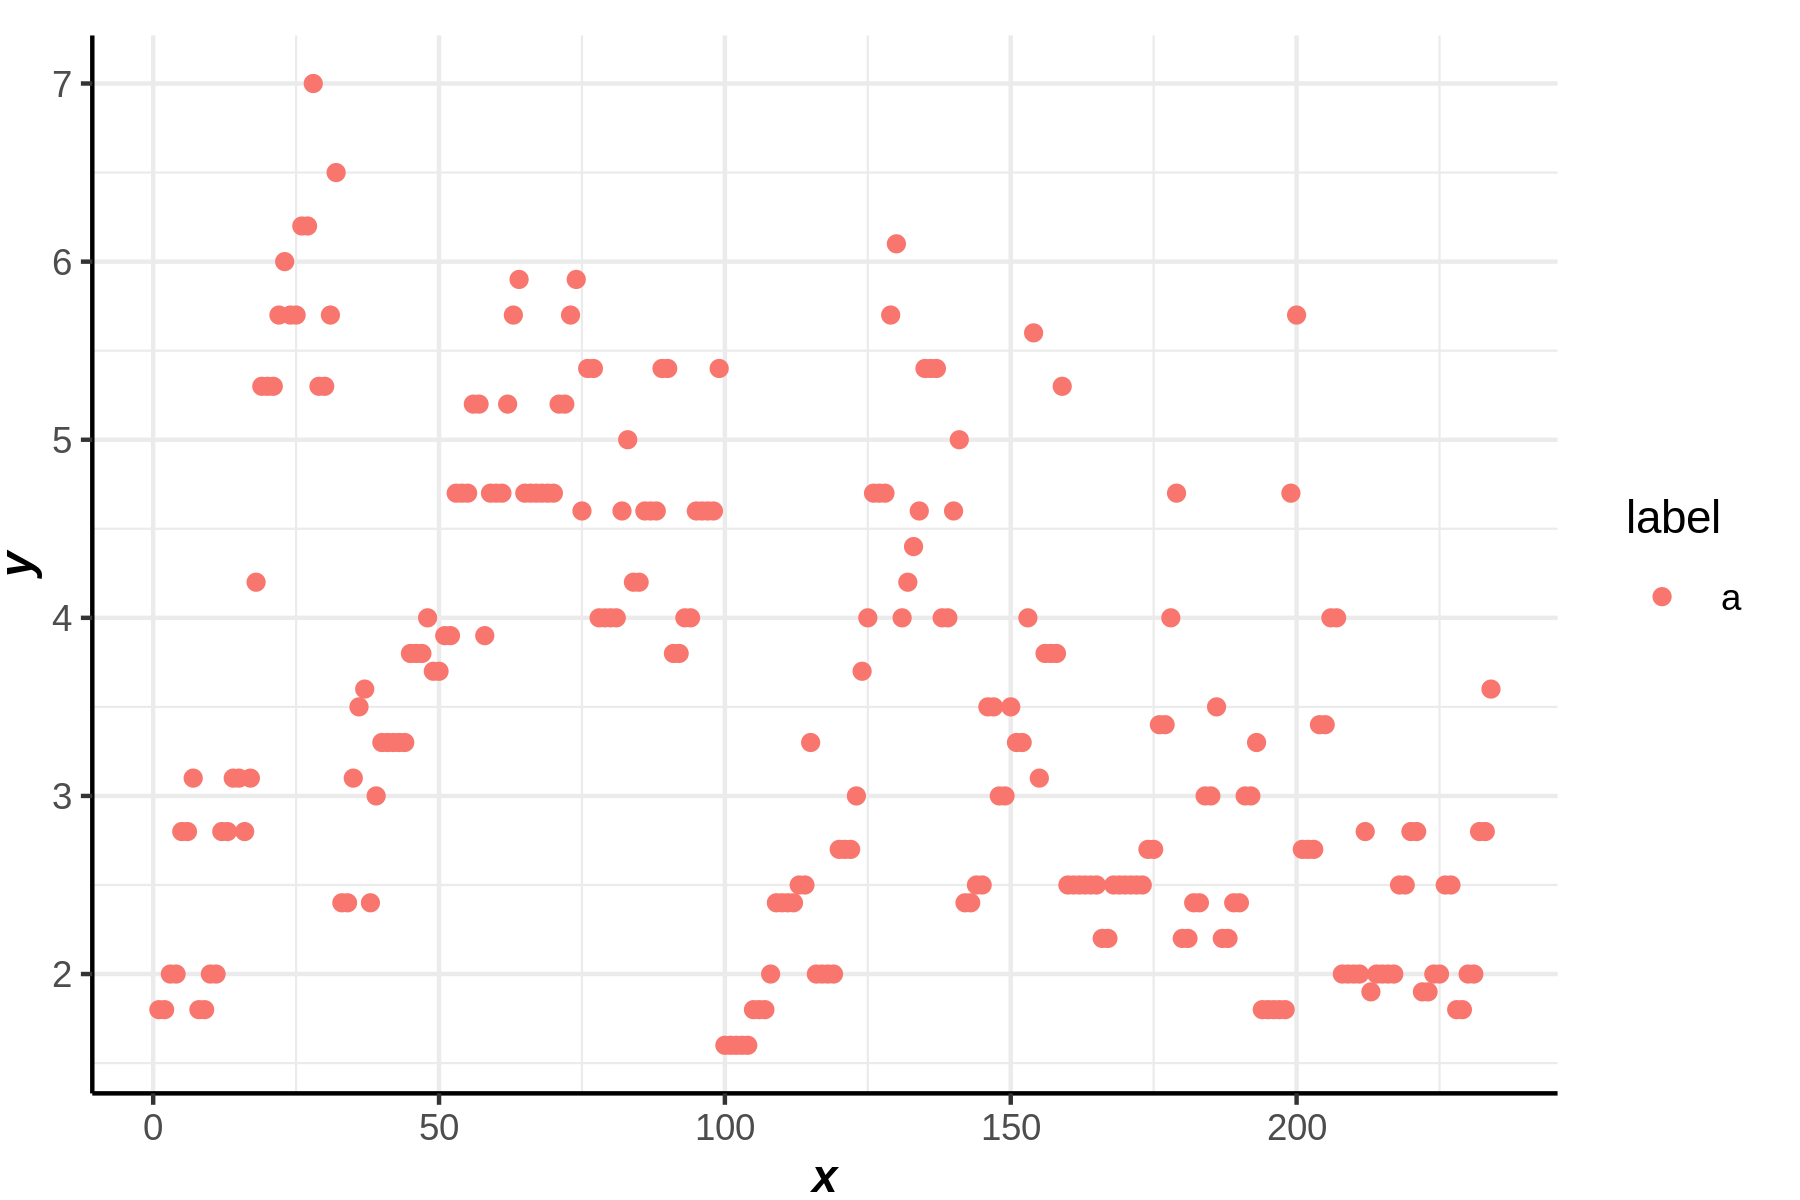

In [29]:
ggplot() + point(mpg$displ,label='a')

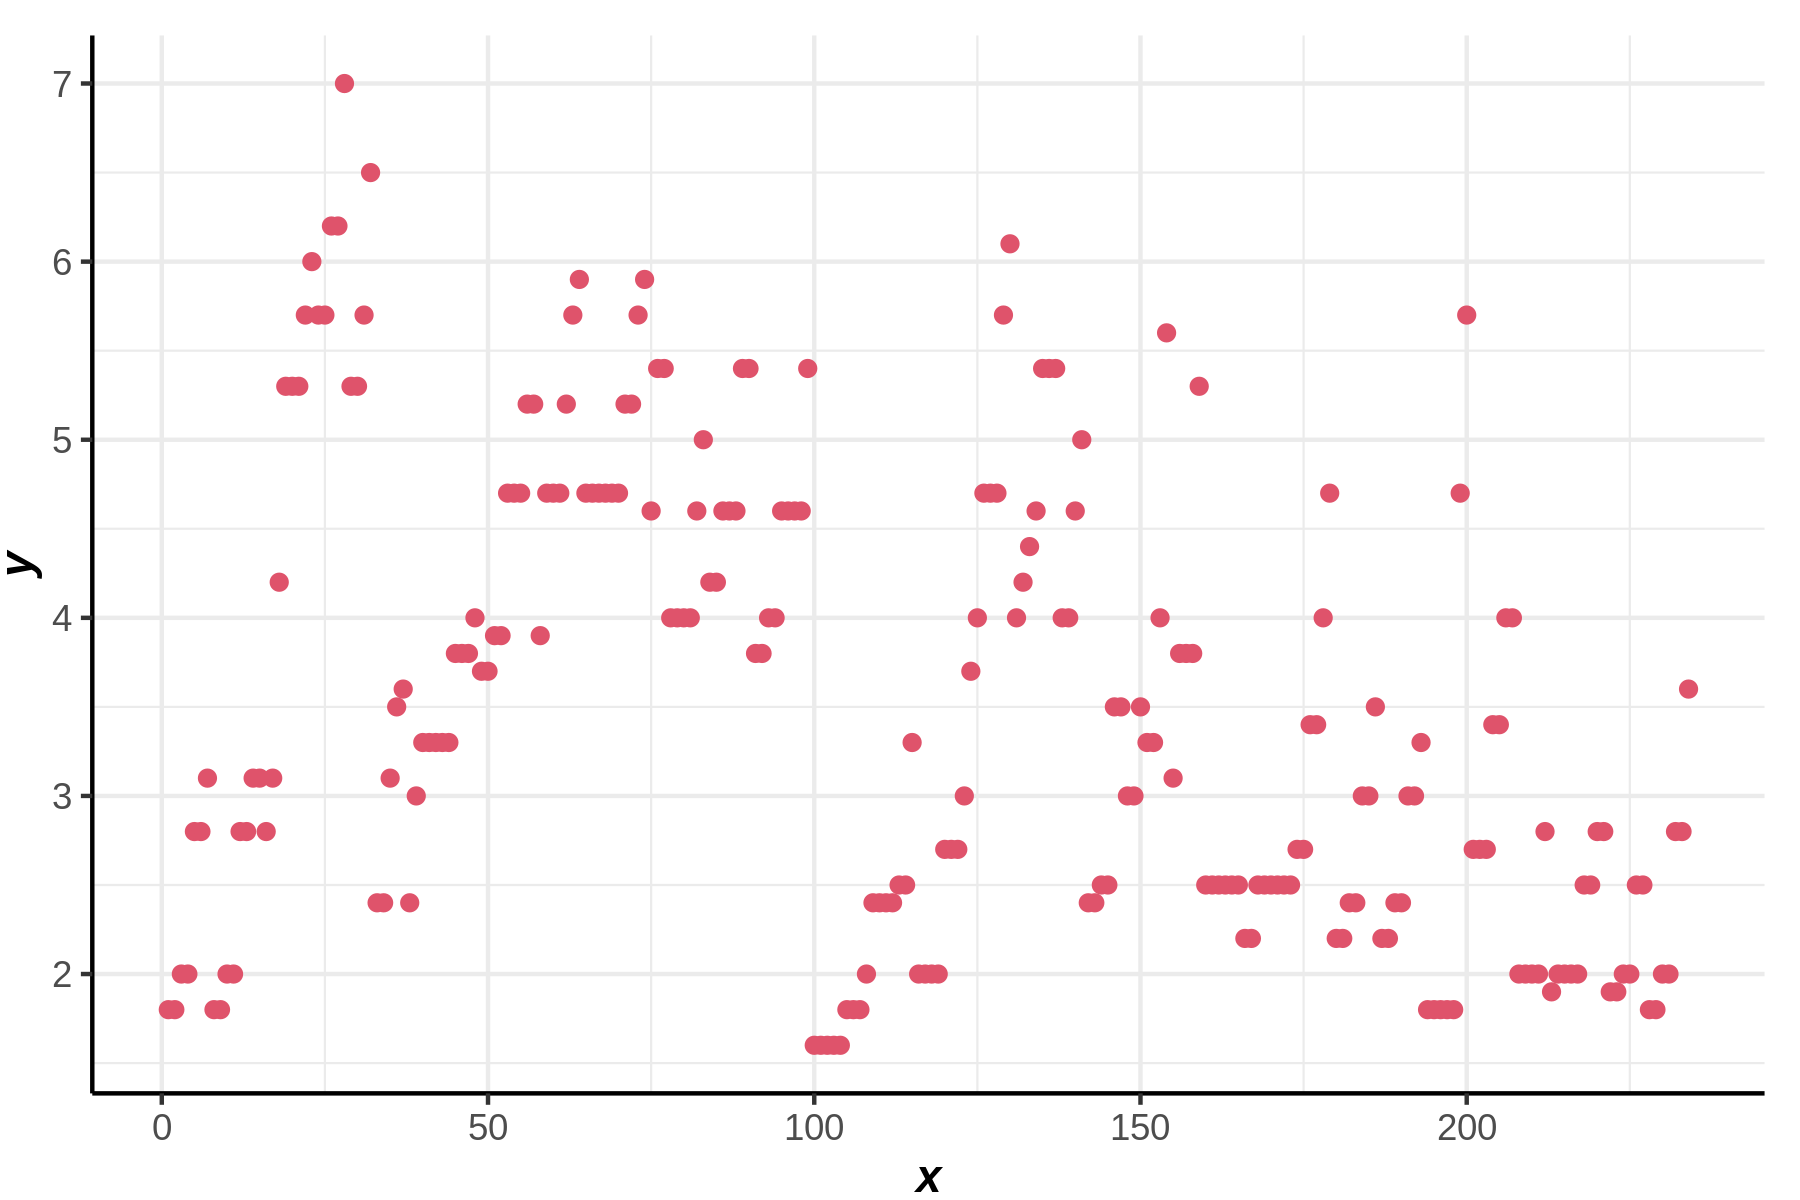

In [30]:
ggplot() + point(mpg$displ,label='a',col=2)

## 2.

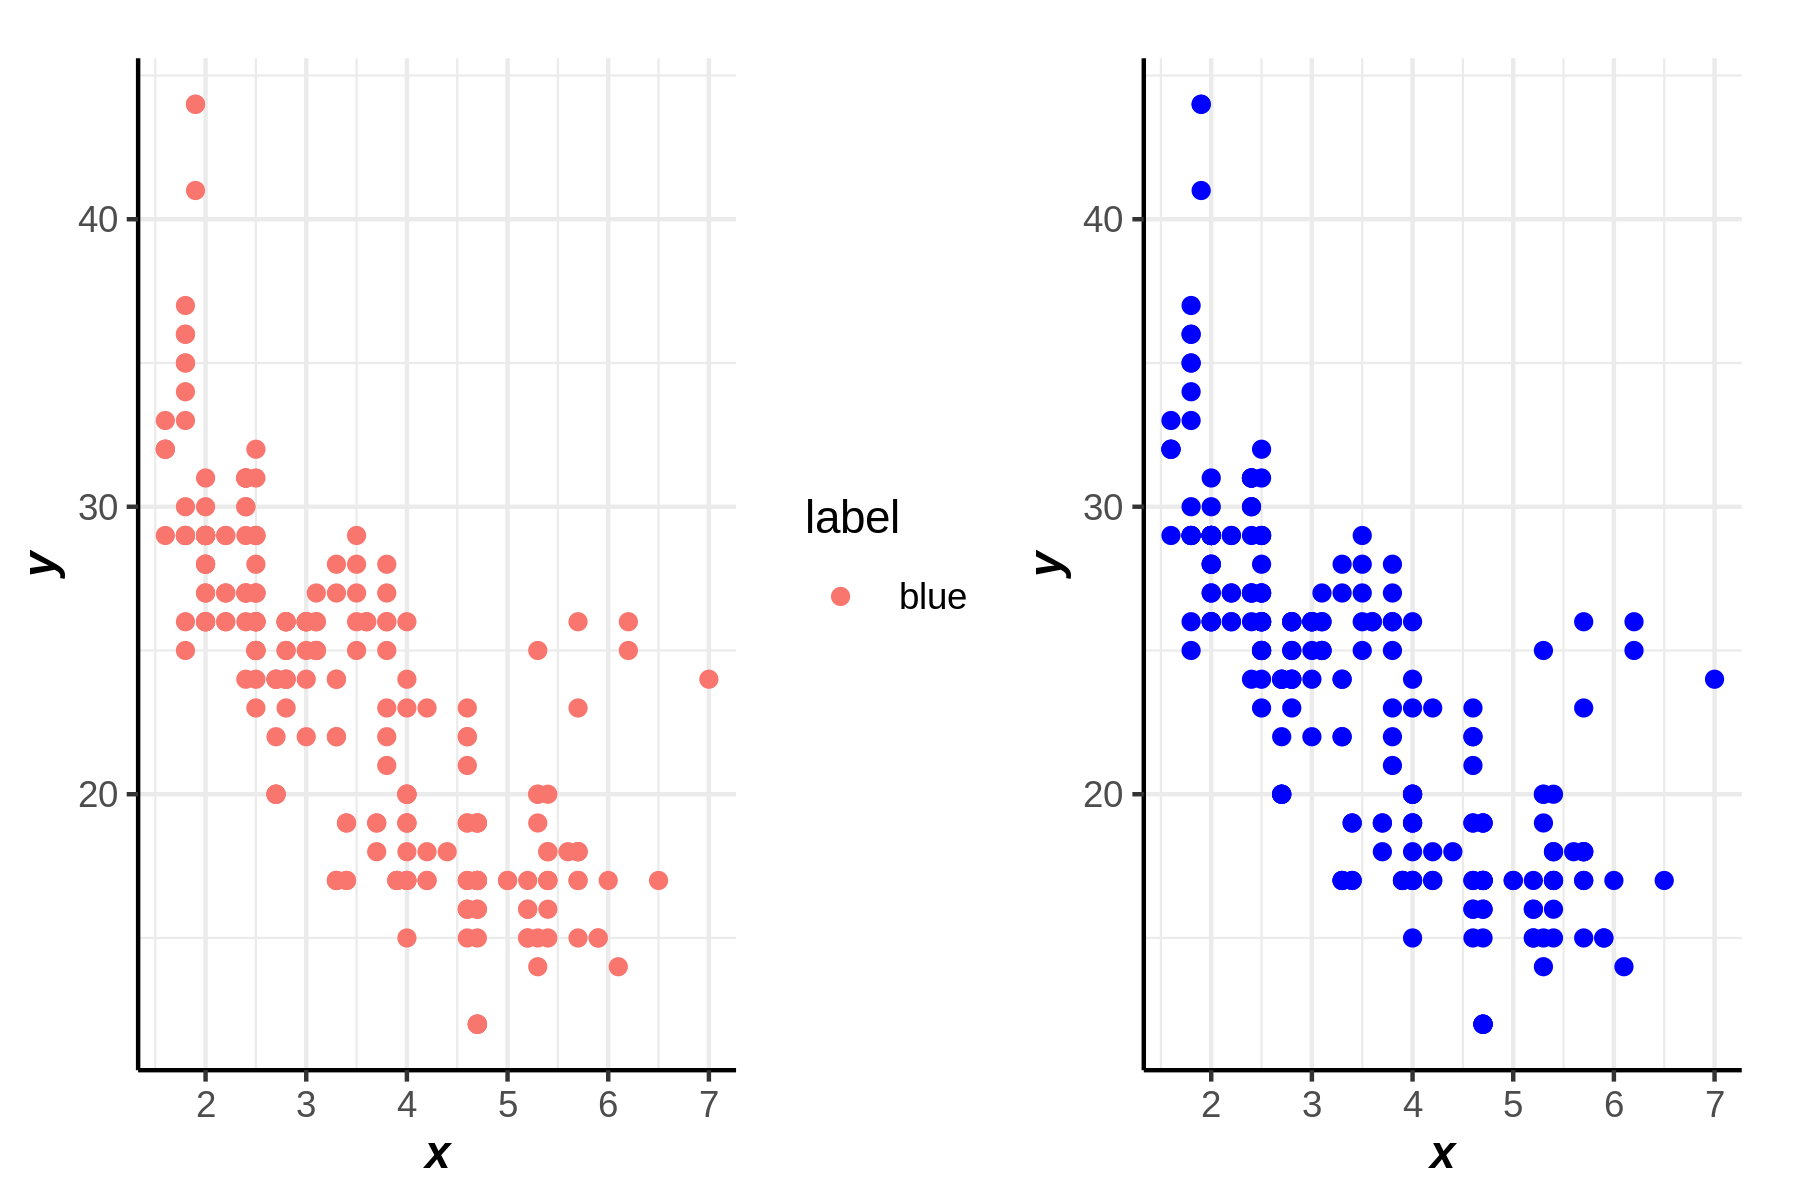

In [31]:
ggplot() + point(label='blue',mpg$displ, mpg$hwy)|ggplot() + point(mpg$displ, mpg$hwy, col='blue')